<a href="https://colab.research.google.com/github/Precillieo/Tensorflow-Computer-Vision-/blob/main/Mnist_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [2]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [3]:
if K.image_data_format() == 'Channels_first':
  train_images= train_images.reshape(train_images.shape[0], 1, 28, 28)
  test_images= test_images.reshape(test_images.shape[0], 1, 28, 28)
  input_shape= (1,28,28)
else:
  train_images= train_images.reshape(train_images.shape[0], 28, 28, 1)
  test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)
  input_shape= (28, 28, 1)


In [4]:
train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

In [5]:
train_images /= 255
test_images /= 255

In [6]:
train_labels= tf.keras.utils.to_categorical(train_labels, 10)
test_labels= tf.keras.utils.to_categorical(test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


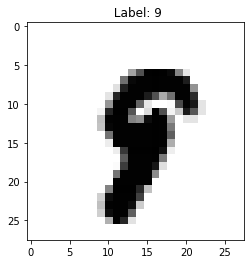

In [7]:
def display_images(number):
  print(train_labels[number])
  label= train_labels[number].argmax(axis= 0)
  image= train_images[number].reshape([28,28])
  plt.title(' Label: %d' % (label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_images(1235)

In [8]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [11]:
history= model.fit(train_images, train_labels,
                   epochs= 10, batch_size= 32,
                   verbose= 2,
                   validation_data= (test_images, test_labels))

Epoch 1/10
1875/1875 - 151s - loss: 0.1404 - accuracy: 0.9577 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 - 151s - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 - 150s - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 - 153s - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 - 151s - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0353 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 - 153s - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 - 150s - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0390 - val_accuracy: 0.9896
Epoch 8/10
1875/1875 - 151s - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 9/10
1875/1875 - 152s - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0399 - val_accuracy: 0.9895
Epoch 10/10
1875/1875 - 152s - loss: 0.0126 - accuracy: 0.9959 -

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.039269402623176575
Test accuracy: 0.9897000193595886
